# Assignment 3.1
Name:  
Date:

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 3.2.

In an exit poll of 1648 voters in the 2020 Senatorial election in Arizona, 51.5% said they voted
for Mark Kelly and 48.5% said they voted for Martha McSally

a) Suppose that actually 50% of the population voted for Kelly. If this exit poll had the
properties of a simple random sample, find the standard error of the sample proportion
voting for him.

b) Under the 50% presumption, are the results of the exit poll surprising? Why? Would you
be willing to predict the election outcome? Explain by (i) conducting a simulation; (ii)
using the value found in (a) for the standard error.

**Answer a):**

In [5]:
import math
sample_size = 1648
population_proportion = 0.5

print(f""" 
Standard Error = Square Root of Population Proportion p & 1-p which is divided by sample size n. 

Refrence: https://www.statology.org/standard-error-of-proportion/
""")

standard_error = round(math.sqrt((population_proportion * (1-population_proportion))/sample_size),4)

print(f""" 
Standard Error of the Sample Proportion Voting for Mark Kelly is {standard_error} """)

 
Standard Error = Square Root of Population Proportion p & 1-p which is divided by sample size n. 

Refrence: https://www.statology.org/standard-error-of-proportion/

 
Standard Error of the Sample Proportion Voting for Mark Kelly is 0.0123 


**Answer b):**



Mathematically Calculated:

- Exit Pole Proportion for Mark Kelly is 51.5%.
- Hypothesis when 50% voted for Mark Kelly with Standard Error 0.0123.
- We will use z-score to determine how far away the observed Sample Proportion 51.5% from the assumed hypothesis 50% in terms of Standard Error.
- z-score = observed - expected / standard error
    
 

Calculations:

- Z-score = 1.22 

- Two Tailed p-values are = 0.22 

This means that 22.00% chances that we would see the result like 51.5% just from Random Sampling..

Since P Value is quiet higher and above the 5% cut-off, the results are not surprising.



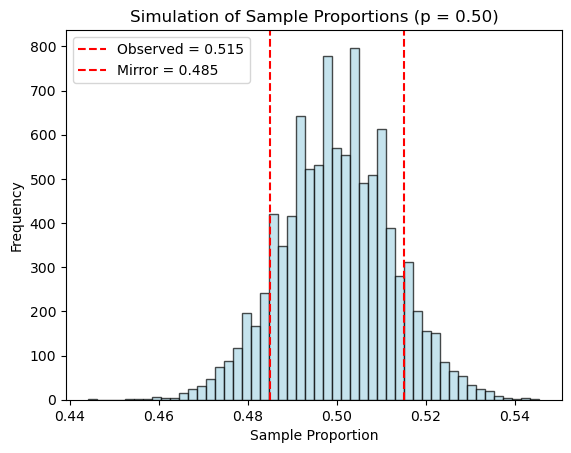

In [20]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


print(
    f"""

Mathematically Calculated:

- Exit Pole Proportion for Mark Kelly is 51.5%.
- Hypothesis when 50% voted for Mark Kelly with Standard Error {standard_error}.
- We will use z-score to determine how far away the observed Sample Proportion 51.5% from the assumed hypothesis 50% in terms of Standard Error.
- z-score = observed - expected / standard error
    """
)

z_score = round(((0.515 - 0.50) / standard_error),3)

p_value = round(2 * (1 - norm.cdf(abs(z_score))),2)

print(f""" 

Calculations:

- Z-score = {z_score} 
- Two Tailed p-values are = {p_value} 

This means that {p_value:.2%} chances that we would see the result like 51.5% just from Random Sampling..
Since P Value is quiet higher and above the 5% cut-off, the results are not surprising.
""")


size = 1648               
p_true_proportion = 0.50             
p_observed = 0.515       
total_simmulations = 10000   

# (i) Simulation: generate samples under H₀
sim_counts = np.random.binomial(n=size, p=p_true_proportion, size=total_simmulations)
sim_props = sim_counts / size

# Two-tailed test: how many simulations were more extreme than observed?
p_lower = 1 - p_observed  # mirror lower bound
extreme = (sim_props >= p_observed) | (sim_props <= p_lower)
p_value_sim = np.mean(extreme)


# Plot
plt.hist(sim_props, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
plt.axvline(p_observed, color='red', linestyle='--', label=f'Observed = {p_observed}')
plt.axvline(p_lower, color='red', linestyle='--', label=f'Mirror = {p_lower}')
plt.title('Simulation of Sample Proportions (p = 0.50)')
plt.xlabel('Sample Proportion')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Problem 3.3.

 The 49 students in a class at the University of Florida made blinded evaluations of pairs of
cola drinks. For the 49 comparisons of Coke and Pepsi, Coke was preferred 29 times. In the
population that this sample represents, is this strong evidence that a majority prefers Coke?
Use a simulation of a sampling distribution to answer.

**Answer:**

**Overview**

We want to check if there is a strong Evidence that Majority preferes Coke. 

To do this we would have a null hypothesis saying that Majority there is no preference and the alternative hypothesis where majority prefers Coke.

Null Hypothesis = Proportion of People prefer Coke is equal to 0.50 => No Preference

Alternative Hypothesis = Proportion of People prefer Coke is greater than 0.50 => Strong Preference for Coke

We would simulate this with 50000 to determine this.

In [29]:
import numpy as np

sample_size = 49
proportion = 0.50
sim_count = 50000

np.random.seed(0)
sim_outputs = np.random.binomial(n=sample_size, p=proportion, size=sim_count)
p_value = np.mean(sim_outputs >= 29) ## This would count p_value when more than 29 of 49 prefer Coke
print(f"""
Calculated p_value is {p_value}.
""")



Calculated p_value is 0.12584.



Since p_value > 0.05, we could not reject the null hypothesis that means **Majority has no preference for Coke.** 

## Problem 3.5.

The example in Section 3.1.4 simulated sampling distributions of the sample mean to determine how precise $\bar{Y}$ for $n=25$ may estimate a population mean $\mu.$

a) Find the theoretical standard error of $\bar{Y}$ for the scenario values of $\sigma = 5$ and 8. How do they compare to the standard deviations of the 100,000 sample means in the simulations?

**Answer Below:a)**

Standard Error = Standard Deviation / SQRT(n).

When Standard Deviation = 5, 

Standard Error = 5 / SQRT(5) = 1

When Standard Deviation = 8,

Standard Error = 8 / SQRT(5) = 1.6

when simulated for 100,000 samples, it should be similar to calcualted above.

b) In the first scenario, we chose $\sigma = 5$ under the belief that if $\mu = 20$, about 2/3 of the sample values would fall between `$`15 and `$`25. For the gamma distribution with $(\mu, \sigma) = (20,5),$ show that the actual probability between 15 and 25 is 0.688.

`Your answer goes here`

In [30]:
from scipy.stats import gamma


rate = 0.8      
scale = 1 / rate  


probability = gamma.cdf(25, a=16, scale=scale) - gamma.cdf(15, a=16, scale=scale)

print(f"P: {probability:.3f}")


P: 0.688


## Problem 3.8.

Construct the sampling distribution of the sample proportion of heads, for flipping a balanced
coin (a) once; (b) twice; (c) three times; (d) four times. Describe how the shape changes
as the number of flips $n$ increases. What would happen if $n$ kept growing? Why?


**Answer:**

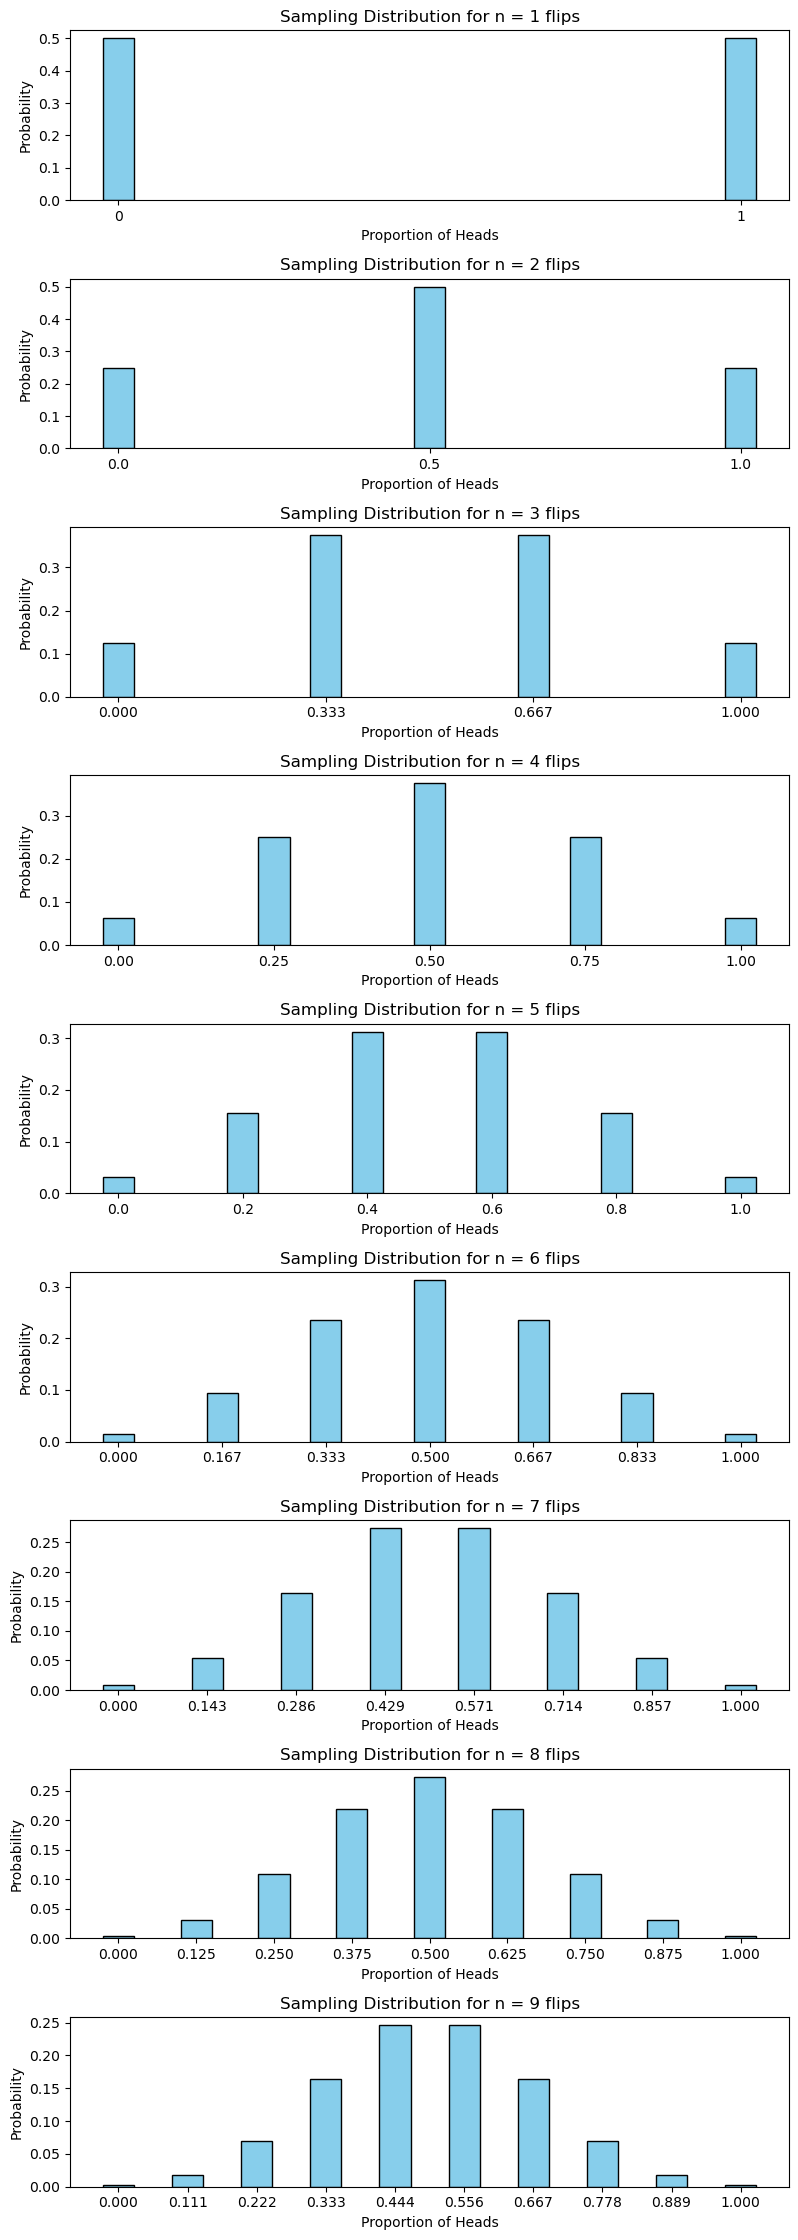

In [2]:
import itertools
import matplotlib.pyplot as plt
from collections import Counter

def get_head_prop_dist(count_of_flips):
    ### We are generaling the list with Head & Tail Count based on number of Flips we are doing.
    flip_outcomes = list(itertools.product(['H', 'T'], repeat=count_of_flips))

    ### This counts the proportion of Head from total Flip Outcomes
    flip_head_proportions = [flip_outcome.count('H') / count_of_flips for flip_outcome in flip_outcomes]

    ### Frequency distribution on how often each proportion occurs.
    head_distribution = Counter(flip_head_proportions)
    
    ### Normalize So Sum of Probability is 1
    total = sum(head_distribution.values())
    for key in head_distribution:
        head_distribution[key] /= total
    
    return dict(sorted(head_distribution.items()))

def plot_distribution(distributions):
    
    fig, axs = plt.subplots(len(distributions), 1, figsize=(8, 2.5 * len(distributions)))
    
    if len(distributions) == 1:
        axs = [axs]
    
    for ax, (n, dist) in zip(axs, distributions.items()):
        ax.bar(dist.keys(), dist.values(), width=0.05, color='skyblue', edgecolor='black')
        ax.set_title(f'Sampling Distribution for n = {n} flips')
        ax.set_xlabel('Proportion of Heads')
        ax.set_ylabel('Probability')
        ax.set_xticks(sorted(dist.keys()))
    
    plt.tight_layout()
    plt.show()

# Run for n = 1 to 4 flips
distributions = {n: get_head_prop_dist(n) for n in range(1, 10)}

# Plot them
plot_distribution(distributions)



**Based on above, it seems to be a Symmetric & Bell-Shaped Distribution that is concentrated towards the center and the number of flips increases**

## Problem 3.13.

Simulate random sampling from a uniform population distribution with several $n$ values to
illustrate the Central Limit Theorem.

`Your answer goes here`

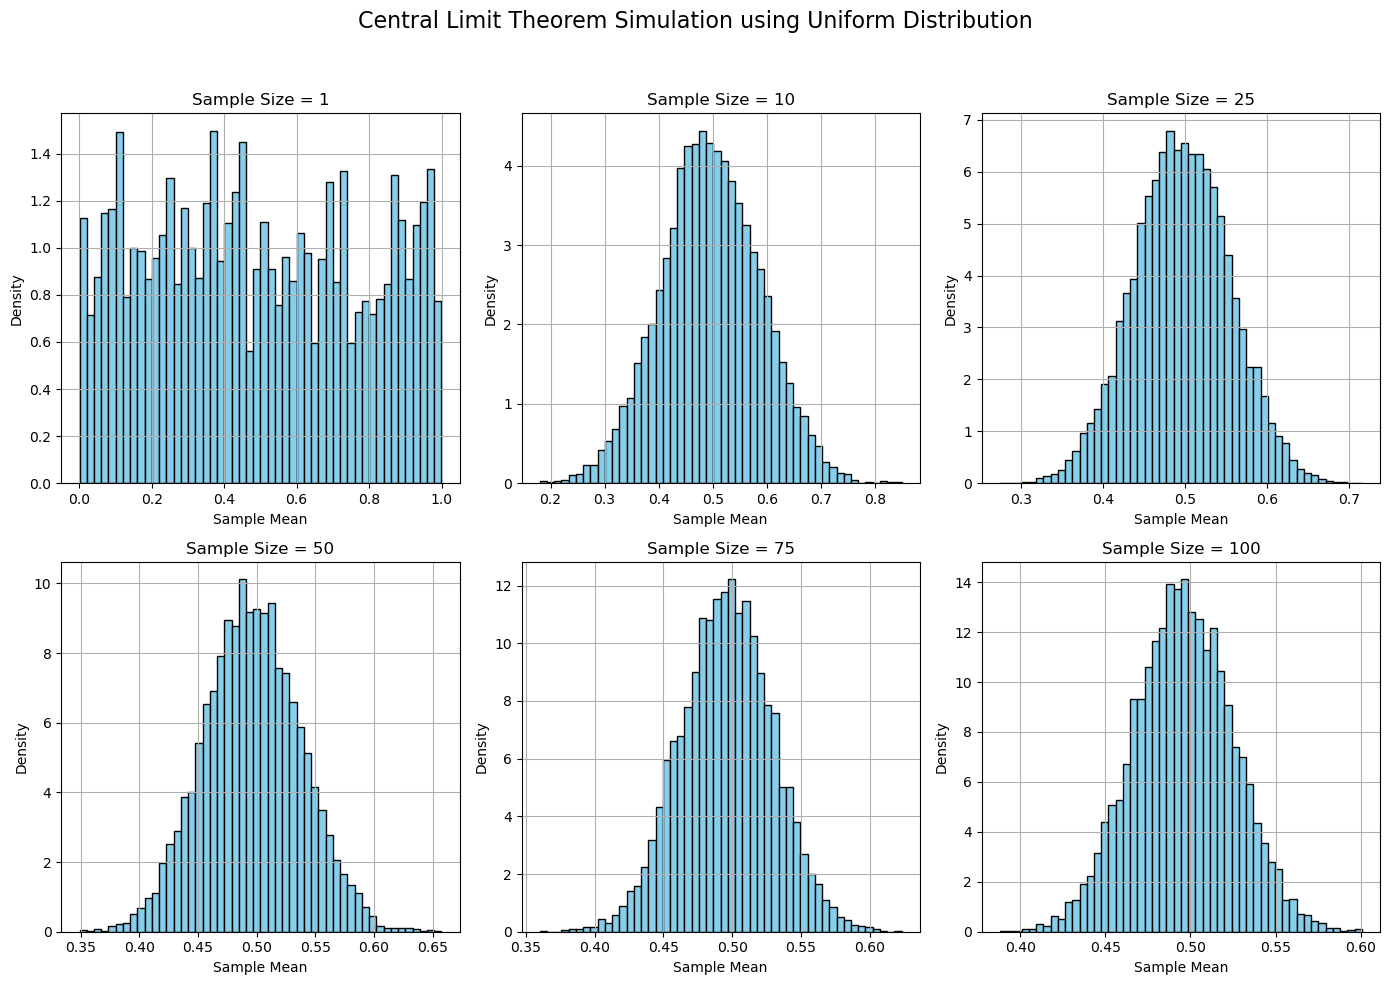

In [13]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

## Population distribution
population = np.random.uniform(0, 1, 1000)

## Sample sizes
sample_sizes = [1,10, 25, 50,75, 100]

# Number of draw
num_draws = 10000

# Plotting
plt.figure(figsize=(14, 10))

for i, n in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(population, size=n)) for _ in range(num_draws)]
    plt.subplot(2, 3, i+1)
    plt.hist(sample_means, bins=50, color='skyblue', edgecolor='black', density=True)
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.grid(True)

plt.suptitle('Central Limit Theorem Simulation using Uniform Distribution', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**From above, it justifies Central Limit Theoram that as the Sample Size Increases, the distribution of Sample Mean becomes Normal Distribution irrespective of shape of Population Distribution** 

## Problem 3.14.

On each bet in a sequence of bets, you win 1 dollar with probability 0.50 and lose 1 dollar (i.e., win negative 1 dollar) with probability 0.50. Let $Y$ denote the total of your winnings and losings after 100 bets. Giving your reasoning, state the approximate distribution of $Y.$ 

**Answer:**

**Overview**

- Given that total bets are 100. Probability of Win 1 Dollar or Lose 1 Dollar is both 50%.
- So conceptually, the distribution should be a Normal Distribution with centered towards 0.
- Now the Variance for each bet would be absolute of (-1) or (1). So Total Variance = 100 $
- Standard Deviation = Square Root of Variance => 10

**So total value of Winning or Lossing would be around 0 Dollars but with Standard Deviation of 10 Dollars, it could go upto 10 Dollar Win or 10 Dollar Lose.** 

## Problem 3.15.

According to a General Social Survey, in the United States the population distribution of $Y$ =
number of good friends (not including family members) has a mean of about 5.5 and a standard
deviation of about 3.9.

a) Is it plausible that this population distribution is normal? Explain.

**Answer:** No. Normal Population Distribution is for Continuous Random Variable but here the Number of friend could be Discrete and cannot be continous. Also the Normal distribution would have +ve & -ve values but you cannot have -ve Friend value and minimum it could be 0.

b) If a new survey takes a simple random sample of 1000 people, describe the sampling
distribution of $\bar{Y}$ by giving its shape and approximate mean and standard error.

**Answer:** 

Based on Central Limit Theoram, the Sample Mean becomes approximately Normal as the Sample Size increases. So the Shape is Normal.

For the Sample Size 1000, using the Mean as 5.5 and Standard Deviation of 3.9,

Standard Error = Standard Deviation / SquareRoot (SampleSize)

So Standard Error = 3.9/SQRT(1000) = 0.123



c) Suppose that actually the mean of 5.5 and standard deviation of 3.9 are not population
values but are based on a sample of 1000 people. Treating results as a simple random
sample, give an interval of values within which you can be very sure that the population
mean falls. Explain your reasoning.

**Answer:**

It is given that Standard Deviation 3.9 is based on Sample and not full Population. Since Standard Deviation of Population is unknown, we need to use the t-distribution.

For a large Sample Value Critical Value t = 1.96

Confidence Interval = mean +- (t * standard error)

In [24]:
import math

std_dev = 3.9
sample_size = 1000
mean_value = 5.5
t = 1.96

std_error = round(std_dev/math.sqrt(sample_size),4)

print(f"""
1. Standard Error is {std_error}""")

lower_range = round(mean_value - (t * std_error),2)
upper_range = round(mean_value + (t * std_error),2)

print(
    f"""

2. Range value between {lower_range} and {upper_range}
    
    """)


1. Standard Error is 0.1233


2. Range value between 5.26 and 5.74
    
    


## Problem 3.18.

Sunshine City, which attracts primarily retired people, has 90,000 residents with a mean age
of 72 years and a standard deviation of 12 years. The age distribution is skewed to the left. A
random sample of 100 residents of Sunshine City has $\bar{y} = 70$ and $s = 11.$

a)  Describe the center and spread of the (i) population distribution, (ii) sample data distribution. What shape does the sample data distribution probably have? Why?

**Answer Below a):**

Given that the Mean age is 72 Years and Standard Deviation is 12 Years. Age Distribution skewed towards left meaning that there are more Senior Age People then Young people (Make sense since it attracts retired people)

i) Population Distribution: 
    - Center = Mean => 72 Years
    - Spread = Standard Deviation => 12 Years

ii) Sample Distribution:
    - Center = Mean => 70 Years
    - Spread = Standard Deviation => 11 Years

Shape of Sample Distribution when the sample size is large would be Normal as per CLT - Central Limit Theoram. We already proved that in above section this theoram.

b) Find the center and spread of the sampling distribution of $\bar{Y}$ for $n = 100.$ What shape does it have and what does it describe?


**Answer Below:**

We are required to find Center and Spread for Sampling Distribution for n = 100. In this case, the Center is the mean of the Population, which is 72 years.

Spread for Sampling Distribution = Standard Error = Standard Deviation of Population / SQRT (n) = 12 / 10 = 1.2

Shape would be Normal as per Central Limit Theoram.

c)  Explain why it would not be unusual to sample a person of age 60 in Sunshine City, but
it would be highly unusual for the sample mean to be 60, for a random sample of 100
residents.

**Answer Below:**

Population Mean is 72 with Standard Deviation of 12. So selecting an individual with 60 Year Old is a 1 Std Deviation away from Mean which is common in Normal Distribution.

It is highly unusual to have sample mean of 60 because randomally pulling a sample of individuals whose mean would be 60 seems to be unlikely theoratically. It can be proven with z-score.

d) Describe the sampling distribution of $\bar{Y}$ : (i) for a random sample of size $n = 1$; (ii) if you sample all 90,000 residents.

**Answer Below:**

i) With the Random sample of size n = 1, the variability will be high but sampling distribution would match the population. So it would be left skewed.

ii) When we sample 90,000 residents, the variability would be less since the entire population is sampled and so it should match the population mean. So Sampling Distribution would be Normal.

## Problem 3.21.

In your school, suppose that GPA has an approximate normal distribution with $\mu = 3.0, \sigma = 0.40.$ Not knowing $\mu$, you randomly sample $n = 25$ students to estimate it. Using simulation for this application, illustrate the difference between a sample data distribution and the sampling distribution of Y .

**Answer Below:**

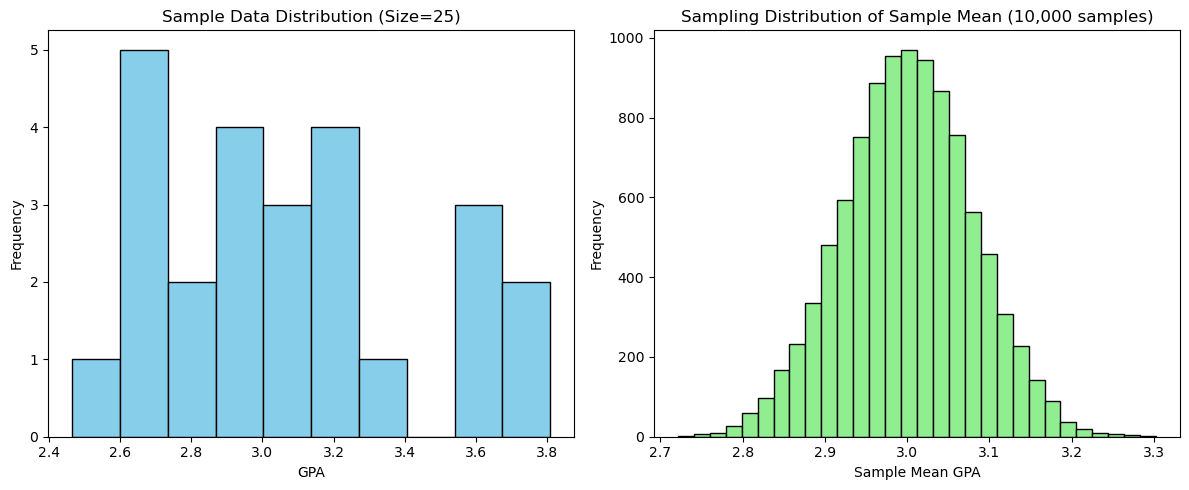

In [25]:
import numpy as np
import matplotlib.pyplot as plt


mean = 3
std_dev = 0.40
sample_size = 25
iterations = 10000

# Step 1: One sample of 25 GPAs
sample = np.random.normal(mean, std_dev, sample_size)

# Step 2: 10,000 samples of size 25, compute means
means = [np.mean(np.random.normal(mean, std_dev, sample_size)) for _ in range(iterations)]

# Plotting
plt.figure(figsize=(12, 5))

# Plot Sample Data Distribution
plt.subplot(1, 2, 1)
plt.hist(sample, bins=10, color='skyblue', edgecolor='black')
plt.title('Sample Data Distribution (Size=25)')
plt.xlabel('GPA')
plt.ylabel('Frequency')

# Plot Sampling Distribution of Mean
plt.subplot(1, 2, 2)
plt.hist(means, bins=30, color='lightgreen', edgecolor='black')
plt.title('Sampling Distribution of Sample Mean (10,000 samples)')
plt.xlabel('Sample Mean GPA')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Sample Distribution Shows Individual GPA deviations while the Sampling Distribution are concentrated around Mean. It demostrates Central Limit Theoram where the Sampling Distribution becomes Normal 

## Problem 3.26.

When sample data were used to rank states by brain cancer rates, Ellenberg (2014) noted
that the highest ranking state (South Dakota) and the nearly lowest ranking state (North
Dakota) had relatively small sample sizes. Also, when schools in North Carolina were ranked
by their average improvement in test scores, the best and the worst schools were very small
schools. Explain how these results could merely reflect how the variability of sample means and
proportions depends on the sample size.

**Answer Below:**

In both the cases, the Sample size is Small. When the sample size is small, It tends to have more variability and gets influenced by extreme values. So Smaller Sample Size lead to Larger Standard Errors.